# tensorflow 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_x , train_y) , (test_x , test_y) = tf.keras.datasets.mnist.load_data()

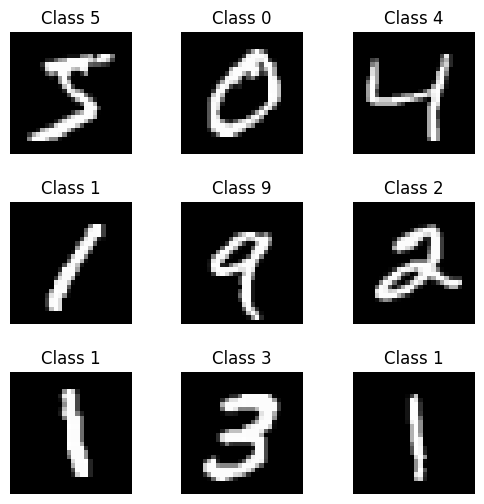

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_x[i], cmap='gray', interpolation='none')
    ax.set_title("Class {}".format(train_y[i]))
    ax.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [5]:
train_x = train_x.astype("float32") / 255
test_x = test_x.astype("float32") / 255
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

In [6]:
train_x.shape , train_y.shape

((60000, 28, 28, 1), (60000,))

In [8]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=[28,28 ,1]),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3) , padding = 'same' , activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3) , padding = 'same' , activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128 , activation = 'relu'),
        tf.keras.layers.Dense(10, activation="softmax")])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [10]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [11]:
checkpoint_filepath = './checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [12]:
model.fit(train_x , train_y , batch_size = 64 , validation_split = 0.1 , epochs=10 , callbacks=[model_checkpoint_callback])

Epoch 1/10


2023-09-29 11:06:54.385902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8801
2023-09-29 11:06:54.595372: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-29 11:06:54.611448: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xb3cf710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-29 11:06:54.611482: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-09-29 11:06:54.611492: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-09-29 11:06:54.620146: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-29 11:06

844/844 [==============================] - 5s 3ms/step - loss: 0.1619 - accuracy: 0.9511 - val_loss: 0.0527 - val_accuracy: 0.9845
Epoch 2/10
599/844 [====================>.........] - ETA: 0s - loss: 0.0495 - accuracy: 0.9842

KeyboardInterrupt: 

In [13]:
model.load_weights(checkpoint_filepath)

In [14]:
model.evaluate(test_x , test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9835


[0.051189638674259186, 0.9835000038146973]

In [15]:
model.fit(train_x , train_y , batch_size = 64 , validation_split = 0.1 , epochs=10 , callbacks=[model_checkpoint_callback])

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0410 - val_accuracy: 0.9872
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9903
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0312 - val_accuracy: 0.9905
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0345 - val_accuracy: 0.9900
Epoch 5/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0455 - val_accuracy: 0.9907
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0381 - val_accuracy: 0.9912
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0475 - val_accuracy: 0.9888
Epoch 

In [16]:
model.evaluate(test_x , test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9900


[0.037028975784778595, 0.9900000095367432]

# torch

In [11]:
from torch.utils import  data
import torch
from torch import nn , cuda , optim
import torch.nn.functional as F
from  torchvision import transforms
from torchvision.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = MNIST('data' , train = True , download = True , transform = transform) 
test_dataset =  MNIST('data' , train = False , download = True , transform = transform) 

In [19]:
b_size = 30
train_data = data.DataLoader(train_dataset , batch_size = b_size , shuffle = True)
test_data = data.DataLoader(test_dataset , batch_size = b_size , shuffle = False)

In [20]:
print(len(train_data))

2000


In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [22]:
device ='cuda' if cuda.is_available() else 'cpu'
model = Net()
model.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [23]:
criterion = nn.CrossEntropyLoss()
optimize = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


def train(epoch):
    model.train()
    for b_i, data in enumerate(train_data):
        data_, label = data[0].to(device), data[1].to(device)
        optimize.zero_grad()
        predict = model(data_)
        fault = criterion(predict, label)
        fault.backward()
        optimize.step()

def test():
    model.eval()
    Fault = 0
    Right = 0
    for img, label in test_data:
        img, label = img.to(device), label.to(device)
        predict = model(img)
        Fault += criterion(predict, label).item()
        result = predict.data.max(1, keepdim=True)[1]
        Right += result.eq(label.data.view_as(result)).cpu().sum()
    Fault /= (len(test_data.dataset))
    print(f"Aniqlik : {Right / len(test_data.dataset)}, Foizda {100.0 * Right / len(test_data.dataset)}%")


In [24]:
epochs = 10
for epoch in range(epochs):
    train(epoch)
    test()
    torch.save({'state_dict' : model.state_dict(), 'epoch' : epoch } , 'torch_checkpoint.pth.tar')

Aniqlik : 0.9782000184059143, Foizda 97.81999969482422%
Aniqlik : 0.9854000210762024, Foizda 98.54000091552734%


KeyboardInterrupt: 

In [25]:
check_model = torch.load('torch_checkpoint.pth.tar')

In [26]:
print(check_model['epoch'])

1


In [27]:
model.state_dict(check_model['state_dict'])

/home/airi/.local/lib/python3.9/site-packages/torch/nn/modules/module.py:1802: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


OrderedDict([('conv1.weight',
              tensor([[[[-2.8752e-01, -5.6079e-01,  2.2846e-01],
                        [ 6.2942e-02, -2.3459e-01,  5.2300e-01],
                        [-1.3820e-01,  4.1693e-01,  4.0713e-01]]],
              
              
                      [[[ 3.2125e-01,  4.0094e-01, -9.4188e-02],
                        [ 4.0793e-01, -2.5755e-01, -3.4966e-01],
                        [ 3.7314e-01, -1.4628e-02, -4.3575e-01]]],
              
              
                      [[[ 4.8438e-02,  1.0460e-01,  3.5829e-01],
                        [ 6.6788e-02, -2.7249e-01, -3.0044e-01],
                        [ 1.4994e-02, -2.1197e-01,  1.2199e-01]]],
              
              
                      [[[ 2.0162e-01,  4.2005e-01,  2.3519e-01],
                        [ 2.0642e-01, -3.2094e-02, -2.5262e-01],
                        [ 3.6086e-01, -2.9783e-01, -5.5902e-01]]],
              
              
                      [[[-1.8711e-01,  1.4039e-01, -4.1822e-01

In [28]:
epochs = 10
for epoch in range(epochs):
    train(epoch)
    test()
    torch.save({'state_dict' : model.state_dict(), 'epoch' : epoch } , 'torch_checkpoint.pth.tar')

Aniqlik : 0.9882000088691711, Foizda 98.81999969482422%
Aniqlik : 0.9876000285148621, Foizda 98.76000213623047%
Aniqlik : 0.9887999892234802, Foizda 98.87999725341797%
Aniqlik : 0.9904999732971191, Foizda 99.05000305175781%
Aniqlik : 0.9905999898910522, Foizda 99.05999755859375%
Aniqlik : 0.9902999997138977, Foizda 99.02999877929688%
Aniqlik : 0.9901999831199646, Foizda 99.0199966430664%
Aniqlik : 0.9908000230789185, Foizda 99.08000183105469%
Aniqlik : 0.9915000200271606, Foizda 99.1500015258789%
Aniqlik : 0.9919999837875366, Foizda 99.19999694824219%
